# CHAPTER 6: Entropy and Divergence

### This code runs simulation for Example 15, and generates Figure 4 from Chapter 6: Entropy and Divergence (vol I)
TEXT: A. H. Sayed, INFERENCE AND LEARNING FROM DATA, Cambridge University Press, 2022.

<div style="text-align: justify">
DISCLAIMER:  This computer code is  provided  "as is"   without  any  guarantees.
Practitioners  should  use it  at their own risk.  While  the  codes in  the text 
are useful for instructional purposes, they are not intended to serve as examples 
of full-blown or optimized designs. The author has made no attempt at optimizing 
the codes, perfecting them, or even checking them for absolute accuracy. In order 
to keep the codes at a level  that is  easy to follow by students, the author has 
often chosen to  sacrifice  performance or even programming elegance in  lieu  of 
simplicity. Students can use the computer codes to run variations of the examples 
shown in the text. 
</div>

The Jupyter notebook and python codes are developed by Semanur Avşar 

## *Example 6.15 - Fitting Gaussian distributions*
 
Consider again a collection of $N$ iid  Gaussian random variables with $\mathcal{x_n}\sim {\cal N}_{\mathcal{x_n}}(\mu,\sigma^2)$. We assume in this example that both $(\mu,\sigma^2)$ are unknown and let the Gaussian distribution be parameterized by $\theta=\mbox{col}\{\mu,\sigma^2\}$. We estimate these parameters by maximizing the log-likelihood function of the observations, which according to ($6.102$) is defined as the log of the joint pdf of the observations, namely, 

$$
\theta^{o}=\underset{\theta\in\mathbb{R}^2}{\text{argmin}}\, \ell(\theta) \quad \text{(6.132)}
$$

where 

$$
\ell(\theta) = \ell(\mu, \sigma^2) \triangleq -\ln\left\{ p_{\mathbf{x}_1,\mathbf{x}_2,\ldots,\mathbf{x}_N}(x_1,x_2,\ldots,x_N;\theta)\right\} \\ = \frac{N}{2}\ln(2\pi\sigma^2) + \frac{1}{2\sigma^2}\sum_{n=1}^N (x_n-\mu)^2 \quad \text{(6.133)}
$$


We will explain in Chapter$~31$ that problems of this type arise in the context of  maximum-likelihood estimation.
 
It is straightforward to verify for this example that:

$$
\nabla_{\theta} \ell(\theta) = \begin{bmatrix}
-\frac{1}{\sigma^2} \sum_{n=1}^N (x_n-\mu) \\
\frac{N}{2\sigma^2}-\frac{1}{2\sigma^4} \sum_{n=1}^N (x_n-\mu)^2
\end{bmatrix}  \quad \text{(6.134)}
$$

$$
\nabla_{\theta}^2 \ell(\theta) = \begin{bmatrix}
\frac{N}{\sigma^2} & \frac{1}{\sigma^4} \sum_{n=1}^N (x_n-\mu) \\
\frac{1}{\sigma^4} \sum_{n=1}^N (x_n-\mu) & -\frac{N}{2\sigma^4}+\frac{1}{\sigma^6} \sum_{n=1}^N (x_n-\mu)^2
\end{bmatrix} \quad \text{(6.135)}
$$

where $F(\theta)$ is defined as:

$$
F(\theta) = \mathbb{E}_{p}[\nabla_{\theta}^2 \ell(\theta)] = \begin{bmatrix}
\frac{N}{\sigma^2} & 0 \\
0 & \frac{N}{2\sigma^4}
\end{bmatrix} \quad \text{(6.136)}
$$

Observe how the Hessian matrix is data-dependent; its entries depend on the samples $\{x_n\}$, while the entries of the Fisher information matrix are data-independent due to the averaging operation. Obviously, by ergodicity, and for $N$ large enough, the Hessian matrix $\nabla_{\theta}^2 \ell(\theta)$ tends to $F(\theta)$.


We can set the gradient vector of $\ell(\theta)$ to zero at the solution $(\widehat{\mu},\widehat{\sigma}^2)$ to obtain

$$
\widehat{\mu} = \frac{1}{N}\sum_{n=1}^N x_n, \quad \widehat{\sigma}^2 = \frac{1}{N}\sum_{n=1}^N (x_n-\widehat{\mu})^2 \quad \text{(6.137)}
$$

However, it can be verified that this estimator for $\sigma^2$ is biased, meaning that its mean does not coincide with the true parameter $\sigma^2$ (see Prob.$~31.1$), namely,

$$
\mathbb{E}[\widehat{\sigma}^2] = \frac{N-1}{N}\sigma^2 \quad \text{(6.138)}
$$

Therefore, it is customary to employ the following alternative expression for estimating the variance of the Gaussian distribution from sample realizations:

$$
\widehat{\sigma}^2 = \frac{1}{N-1}\sum_{n=1}^N (x_n-\widehat{\mu})^2 \quad \text{(6.139)}
$$

where we are now dividing by $N-1$. We generate $N=400$ random realizations $\{x_n\}$ from a Gaussian distribution with its mean chosen randomly at $\mu=1.3724$ and with variance set to $\sigma^2=4$. We used the above expressions to estimate the mean and variance leading to

$$
\widehat{\mu} = 1.4406, \quad \widehat{\sigma}^2 = 3.8953 \quad \text{(6.140)}
$$


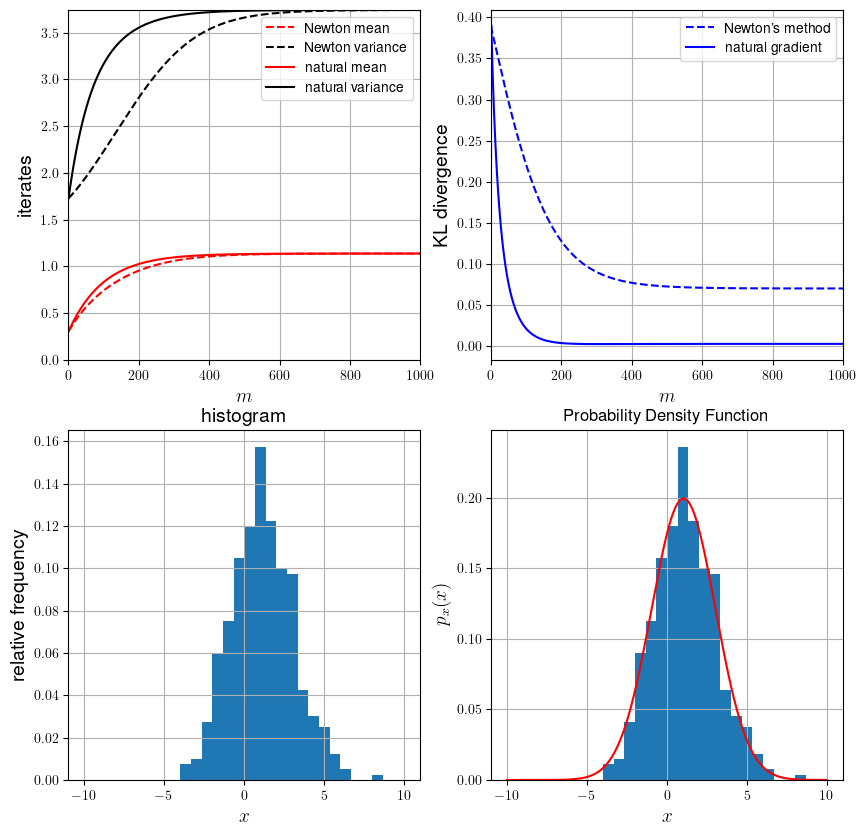

In [31]:
import numpy as np
import matplotlib.pyplot as plt

mu  = 2*np.random.rand() # mean
sigma2 = 4 # variance
N = 400 # number of samples
epsilon=1e-6

x = np.sqrt(sigma2)*np.random.randn(N,1)
x = x+mu

M = 1000 # number of iterations
step = 0.01 # step size

mu_newton   = np.zeros((M,1))
var_newton  = np.zeros((M,1))
mu_natural  = np.zeros((M,1))
var_natural = np.zeros((M,1))
w_newton = np.zeros((2,M))
w_natural = np.zeros((2,M))
KL_newton = np.zeros(M)
KL_natural = np.zeros(M)

mu_newton[0]  = np.random.rand() # initial conditions
var_newton[0] = np.random.rand() + 1
w_newton[:,0] = np.array([mu_newton[0], var_newton[0]])[:,0]

mu_natural[0]  = mu_newton[0]
var_natural[0] = var_newton[0]
w_natural[:,0] = np.array([mu_natural[0], var_natural[0]])[:,0]


term = np.log(var_newton[0]/sigma2) - 1 + (sigma2/var_newton[0]) + ((mu-mu_newton[0])**2/var_newton[0])
KL_newton[0] = 0.5*term

term = np.log(var_natural[0]/sigma2) - 1 + (sigma2/var_natural[0]) + ((mu-mu_natural[0])**2/var_natural[0])
KL_natural[0] = 0.5*term

for m in range(1,M) :
    xc = x - mu_newton[m-1]
    a = ( -np.sum(xc)/var_newton[m-1] )[0]
    yc = xc**2
    b = ( (N/(2*var_newton[m-1]))-(1/(2*var_newton[m-1]*var_newton[m-1]))*np.sum(yc) )[0]
    g_newton = np.array([[a], [b]])
    
    aH = ( N/var_newton[m-1] )[0]
    bH = ( (1/(var_newton[m-1]*var_newton[m-1]))*np.sum(xc) )[0]
    cH = ( (-N/(2*var_newton[m-1]*var_newton[m-1]))+(1/(var_newton[m-1]*var_newton[m-1]*var_newton[m-1]))*np.sum(yc) )[0]
    H = np.array([[aH, bH],[bH, cH]]) # Hessian for Newton
   
    xcn =  x - mu_natural[m-1] 
    an = ( -np.sum(xcn)/var_natural[m-1] )[0]
    ycn = xcn**2
    bn = ( (N/(2*var_natural[m-1]))-(1/(2*var_natural[m-1]*var_natural[m-1]))*np.sum(ycn) )[0]
    g_natural = np.array([[an],[bn]]) # gradient for Newton
    
    F = np.array([[ (N / var_natural[m - 1])[0] , 0], [0, (N / (2 * var_natural[m - 1] * var_natural[m - 1]))[0] ]]) # Fisher
   
    w_newton[:,m]  = w_newton[:,m-1] - (step* np.linalg.inv(epsilon+H) @ g_newton)[:,0]
    w_natural[:,m]  = w_natural[:,m-1]  - (step* np.linalg.inv(epsilon+F) @ g_natural)[:,0]
    
    mu_newton[m]   = w_newton[0,m]
    var_newton[m]  = w_newton[1,m]
    mu_natural[m]  = w_natural[0,m]
    var_natural[m] = w_natural[1,m]
   
    term = np.log(var_newton[m] /sigma2) - 1 + (sigma2/var_newton[m] ) + ((mu-mu_newton[1])**2/var_newton[m])
    KL_newton[m] = 0.5*term

    term = np.log(var_natural[m]/sigma2) - 1 + (sigma2/var_natural[m]) + ((mu-mu_natural[m])**2/var_natural[m])
    KL_natural[m] = 0.5*term
   

## figure 4 (estimating mean and variance of a Gaussian distribution)
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

plt.figure(figsize=(10, 10))

plt.subplot(221)
plt.plot(range(1,M+1),w_newton[0,:],'r--', label='Newton mean')
plt.plot(range(1, M+1), w_newton[1,:], 'k--', label='Newton variance')
plt.xlabel('$m$', fontsize=14)
plt.ylabel('iterates', fontsize=14)
plt.plot(range(1,M+1),w_natural[0,:],'r', label='natural mean')
plt.plot(range(1, M+1), w_natural[1,:], 'k', label='natural variance')
plt.xlim([0, 1000])
plt.ylim([0, np.max(w_newton)])
plt.grid()
plt.legend()

plt.subplot(222)
plt.plot(range(1,M+1),KL_newton,'b--', label='Newton\'s method')
plt.plot(range(1, M+1), KL_natural, 'b', label='natural gradient')
plt.xlabel('$m$', fontsize=14)
plt.ylabel('KL divergence', fontsize=14)
plt.xlim([0, 1000])
plt.grid()
plt.legend()

# (data histograms with and without normalization)
T=10
i=0
t_values = np.arange(-T, T, step)
p = np.zeros(int((T+T)/step))
for t in t_values :
  p[i] = (1/(np.sqrt(2*np.pi*sigma2)))
  p[i] = p[i]*np.exp((-1/(2*sigma2))*(t-mu)**2)
  i=i+1

plt.subplot(223)
weights = np.ones_like(x)/float(len(x))
plt.hist(x, weights= weights, bins=30, range=(-T, T)) # scale the histogram so that the bars sum up to 1
plt.xlabel('$x$', fontsize=14)
plt.ylabel('relative frequency', fontsize=14)
plt.title('histogram', fontsize=14)
plt.xticks(np.arange(-10,11,5))
plt.grid()

plt.subplot(224)
plt.hist(x, bins=30, range=(-T, T), density=True) # plot the normalized histogram
plt.plot(t_values, p, 'r')
plt.xlabel('$x$', fontsize=14)
plt.ylabel(r'$p_{x}(x)$', fontsize=14)
plt.title('Probability Density Function', fontsize=12)
plt.xticks(np.arange(-10,11,5))
plt.grid()
plt.show()

hat_mean = np.mean(x)
hat_var = np.var(x)

**Figure $6.4$** Simulation of Newton and natural gradient recursions ($6.141$)--($6.142$) for estimating the mean and variance of a Gaussian distribution from sample measurements. In this simulation, both algorithms converged close to the true values, with the natural gradient algorithm showing faster convergence. The plots in the bottom row show the normalized and unnormalized  histograms of the samples that were used.

Alternatively, in this example, we can minimize $\ell(\theta)$ iteratively by employing the Newton and the natural gradient recursions. For the problem at hand, these recursions take the form

\begin{align}
\begin{bmatrix}
\mu_m \\
\sigma^2_m
\end{bmatrix}
&=
\begin{bmatrix}
\mu_{m-1} \\
\sigma^2_{m-1}
\end{bmatrix}
- \mu \left( \nabla_{\theta}^2 \ell(\theta_{m-1}) \right)^{-1} \nabla_{\theta^T} \ell(\theta_{m-1})
 \quad \text{(6.141)}
\\
\begin{bmatrix}
\mu_m \\
\sigma^2_m
\end{bmatrix}
&=
\begin{bmatrix}
\mu_{m-1} \\
\sigma^2_{m-1}
\end{bmatrix}
- \mu \, F^{-1}(\theta_{m-1}) \nabla_{\theta^T} \ell(\theta_{m-1})
 \quad \text{(6.142)}
\end{align}

The recursions are not always guaranteed to converge toward the true parameter values. We compare their performance in Fig.$~6.4$ for a case where good convergence is attained. We employed the same $N=400$ samples along with $\mu=0.01$, and ran $M=1000$ iterations. We added $\epsilon I$ to the Hessian matrix and the Fisher information matrix prior to inversion to avoid singularities, where $\epsilon=1\times 10^{-6}$ is a small number. The recursions converged toward $\widehat{\mu}=1.4405$ (Newton), $\widehat{\mu}=1.4406$ (natural gradient), $\widehat{\sigma}^2=3.8852$ (Newton), and $\widehat{\sigma}^2=3.8855$ (natural gradient). Using expression ($6.66$), with $p$ corresponding to the true pdf with parameters $(\mu,\sigma^2)$ and $q$ corresponding to the estimated pdf with parameters $(\mu_m,\sigma^2_m)$, the figure also plots the evolution of the KL divergence between the true Gaussian pdf and its estimated version using both Newton method and the natural gradient algorithm. It is obvious that the latter leads to smaller KL divergence, as expected by construction.

 


### *Remark 6.1 (Unnormalized and normalized histograms)*

We refer to the two histograms shown in the bottom row of Fig.$~6.4$. The horizontal axis in both plots is the variable $x$ with values ranging over $[-10,10]$. This interval is divided into $30$ smaller bins in the figure. The vertical axis in the histogram on the left represents the relative frequency of values of $x$ within each bin. For example, if we consider the bin that is centered at $x=5$, its relative frequency is approximately $0.025$, suggesting that $2.5\%$ of the values of $x$ fall into this bin. In the histogram on the right, each relative frequency is normalized by the width of the bin. The result is an approximate pdf representation. This normalization is motivated by the following observation. Consider a generic pdf, $p_{\mathbf{x}}(x)$. If we integrate it over some interval $[x_0,x_0+\Delta x]$, we obtain a measure for the relative frequency of values of $x$ falling into this range:

$$
\int_{x_0}^{x_0+\Delta x}p_{\mathbf{x}}(x)dx = \mbox{relative frequency within $[x_0,x_0+\Delta x]$} \quad \text{(6.143)}
$$

Approximating the area under the integral by $p_{\mathbf{x}}(x_0)\Delta x$, we find that the value of the pdf location $x_0$ is roughly

$$
p_{\mathbf{x}}(x_0) \approx \frac{\mbox{relative frequency}}{\Delta x} \quad \text{(6.144)}
$$

In other words, by dividing relative frequencies by the width of the bins, we obtain an approximation for the pdf of $x$. We used this method to construct the histogram shown on the right from the histogram on the left.
